## Seaborn Exercises

In [8]:
# Loaded all libraries that might be needed for the lesson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [72]:
# Loaded all the datasets for the lesson
iris = sns.load_dataset('iris')
ae = sns.load_dataset('anscombe')
insect = data('InsectSprays')
swiss = data('swiss')
sleepstudy = data('sleepstudy')

### Use the iris database to answer the following quesitons:

    - What does the distribution of petal lengths look like?
    - Is there a correlation between petal length and petal width?
    - Would it be reasonable to predict species based on sepal width and sepal length?
    - Which features would be best used to predict species?

In [13]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


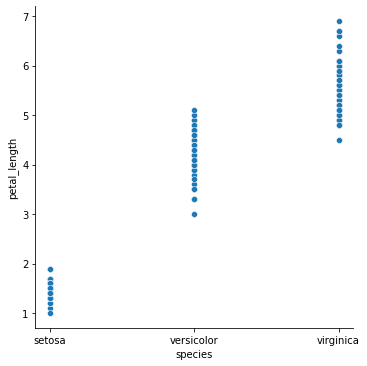

In [21]:
# What does the distribution of petal lengths look like?
# Different species have petal lengths that fall within certain parameters
sns.relplot(x = 'species', y = 'petal_length', data = iris)

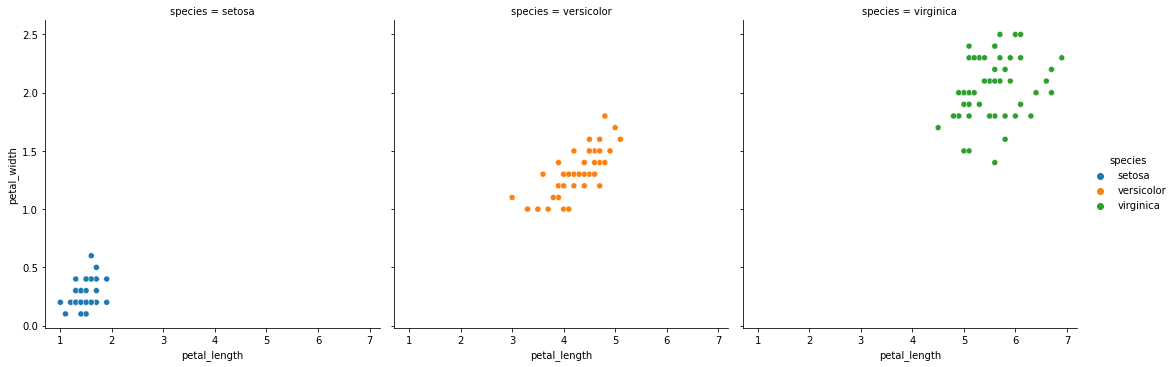

In [23]:
# Is there a correlation between petal length and petal width?
# There seems to be a linear correlation between petal length and width
# the longer the petal, the longer the width
sns.relplot(x = 'petal_length', y = 'petal_width', col = 'species', hue = 'species', data = iris)

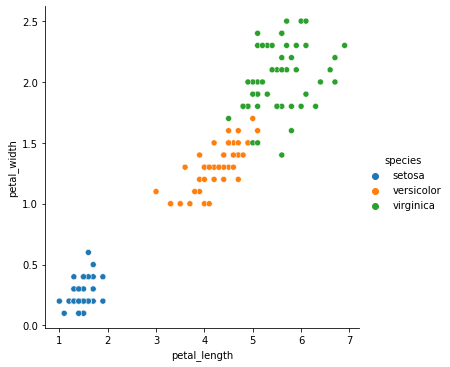

In [24]:
# All species on one plot to compare petal length and petal width across species
sns.relplot(x = 'petal_length', y = 'petal_width',  hue = 'species', data = iris)

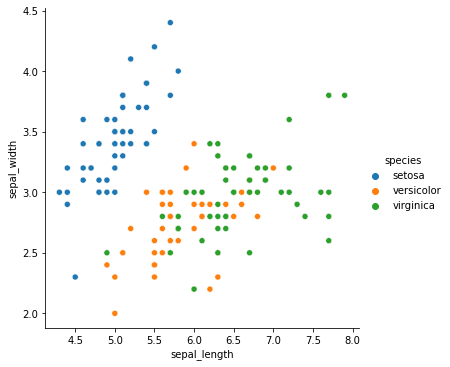

In [26]:
# Would it be reasonable to predict species 
# based on sepal width and sepal length?
# Possibly to predict setosa from versicolor and virginica.
# But it would be harder to predit species by sepal attributes
# between versicolor and virginia because their ranges
# of sepal lengths overlap with each other.
sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)

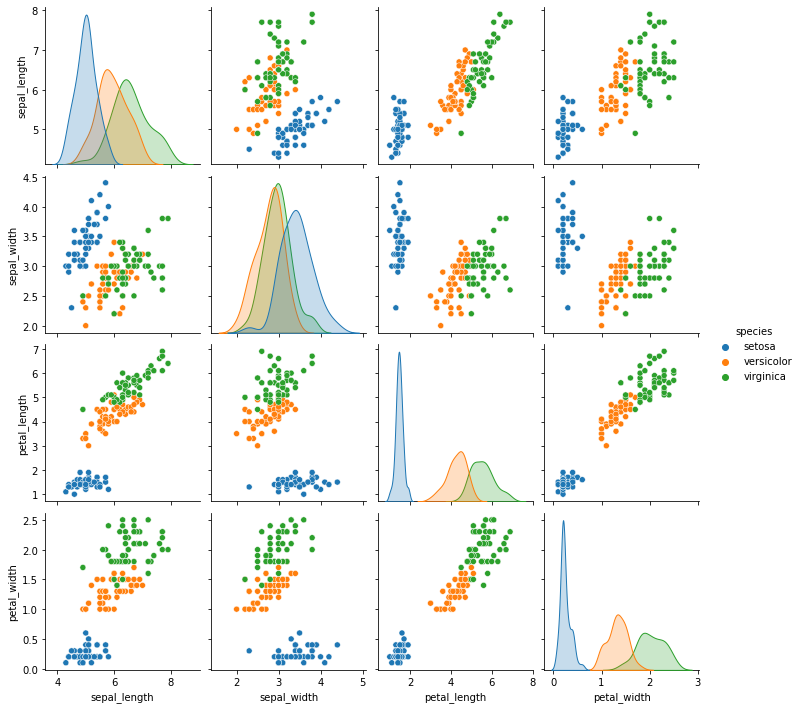

In [114]:
# Which features would be best used to predict species?
# Petal length and petal width.  

sns.pairplot(data = iris, hue = 'species')

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [115]:
ae.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [116]:
# Plot the x and y values from the anscombe data. 
# Each dataset should be in a separate column.
ae.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

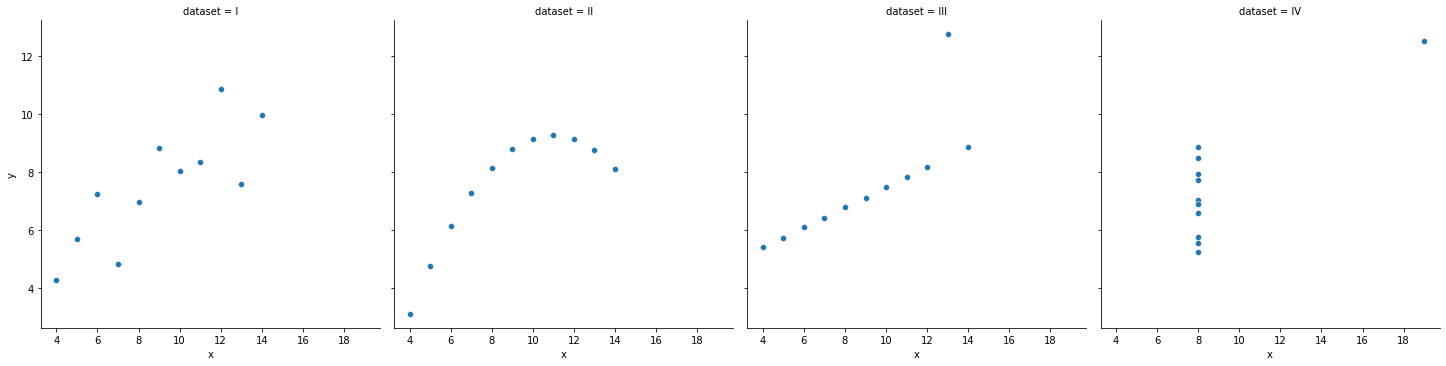

In [117]:
sns.relplot(data = ae, x = 'x', y ='y', col = 'dataset')

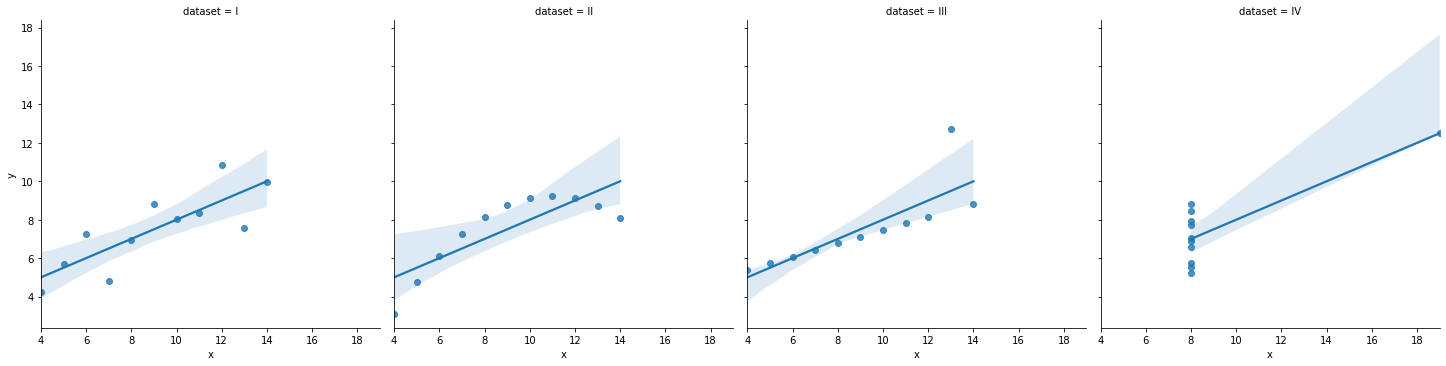

In [118]:
sns.lmplot(data = ae, x = 'x', y = 'y', col = 'dataset')

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [32]:
# Documentation for insect sprays 
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [34]:
insect.dtypes

count     int64
spray    object
dtype: object

In [33]:
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

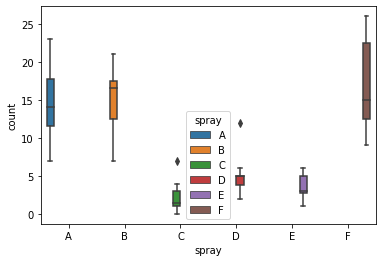

In [119]:
# Create a boxplot that shows the effectiveness of the different insect 
# sprays.
sns.boxplot(data = insect, x = 'spray', y = 'count', hue = 'spray')

### 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
    - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - Does whether or not a province is Catholic influence fertility?
    - What measure correlates most strongly with fertility?

In [40]:
# Documentation of swiss dataset
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [41]:
swiss.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [39]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [59]:
# Create an attribute named is_catholic that holds a boolean value of 
# whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)
is_swiss_catholic = swiss.Catholic >= 51.0
is_swiss_catholic.head()

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Name: Catholic, dtype: bool

In [60]:
swiss['is_catholic'] = is_swiss_catholic
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


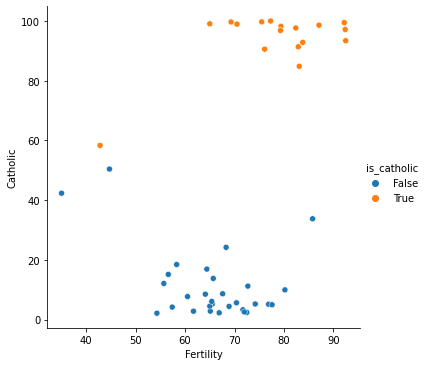

In [61]:
# Does whether or not a province is Catholic influence fertility?
# catholic vs not catholic fertility 
# There seem to be a greater amount of fertility in people who are catholic, 
# but there may be other socioeconomic factors that play a role.
sns.relplot(x='Fertility', y='Catholic', hue = 'is_catholic', data = swiss)

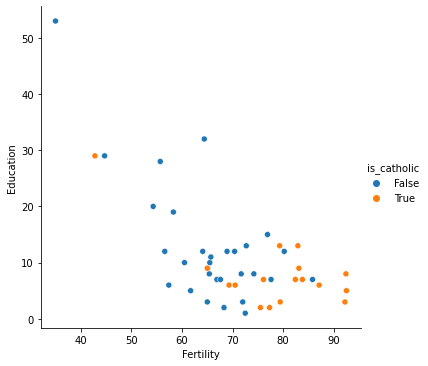

In [62]:
# What measure correlates most strongly with fertility?
# Fertility vs education
sns.relplot(x='Fertility', y='Education', hue = 'is_catholic', data = swiss)

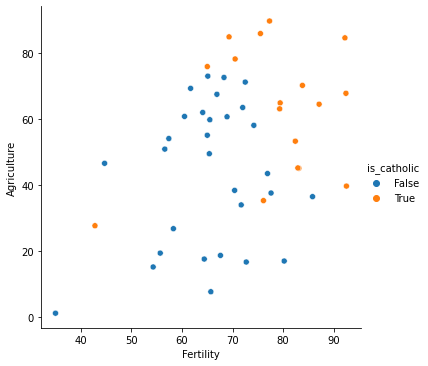

In [63]:
# Fertility vs Agriculture
# As agriculture score increased, fertility also increased
sns.relplot(x='Fertility', y='Agriculture', hue = 'is_catholic', data = swiss)

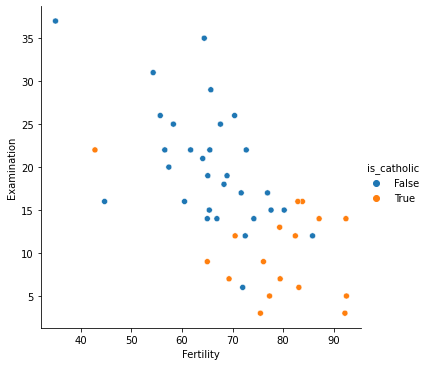

In [64]:
# Fertility vs Examination
sns.relplot(x='Fertility', y='Examination', hue = 'is_catholic', data = swiss)

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [65]:
from env import host, password, user

In [66]:
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [67]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [68]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [ ]:
# Create a bar chart that shows the 
# 4 most popular items and the revenue produced by each.

In [69]:
# Reassign my cleanup to item_price in my df.
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [71]:
# What are the 4 most popular items?
top_four = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)
top_four


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [125]:
# or this way
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers.index



Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [ ]:
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most Popular Items and Revenue')

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [73]:
# Load the sleepstudy data and read it's documentation. 
# Documentation of sleepstudy
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [74]:
# Check the data types
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [79]:
# Check out the data set
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [107]:
# Use seaborn to create a line chart of all the individual subject's reaction 
# times and a more prominant line showing the average change in reaction time.
sleepstudy.Subject.nunique() #18 participants so there should be 18 lines
#Group reaction times by subject
sort_sleep = sleepstudy.sort_values('Subject')
sort_sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
175,287.1726,4,372
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

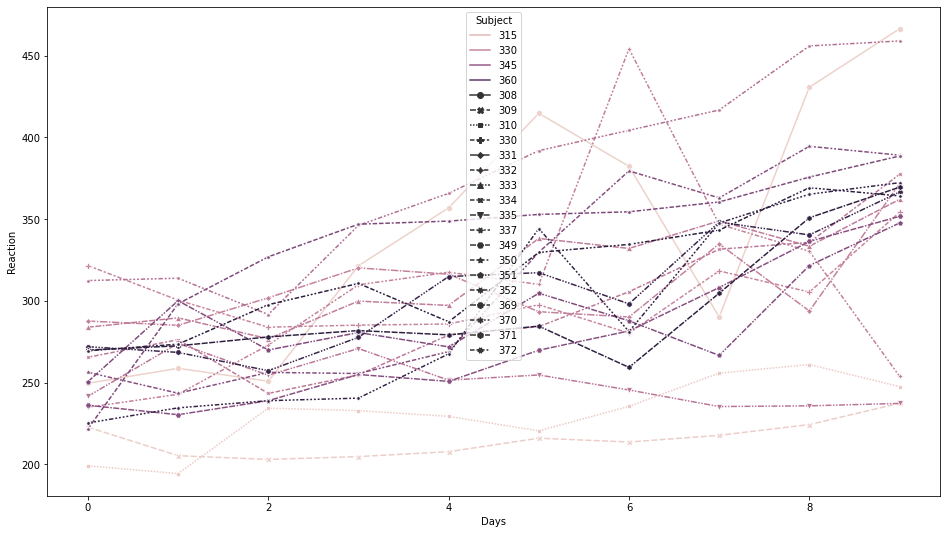

In [126]:
# Use seaborn to create a line chart of all the individual subject's reaction 
plt.figure(figsize=(16,9))

sns.lineplot(x="Days", y="Reaction", hue = 'Subject', style='Subject', markers=True, data = sort_sleep)



In [127]:
# Add more prominant line showing the average change in reaction time.
# mean value for each day
sleepstudy.groupby('Days').mean()


,Reaction,Subject
Days,,
0,256.651806,341.277778
1,264.495756,341.277778
2,265.361900,341.277778
3,282.992011,341.277778
4,288.649422,341.277778
5,308.518456,341.277778
6,312.178256,341.277778
7,318.750583,341.277778
8,336.629506,341.277778


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

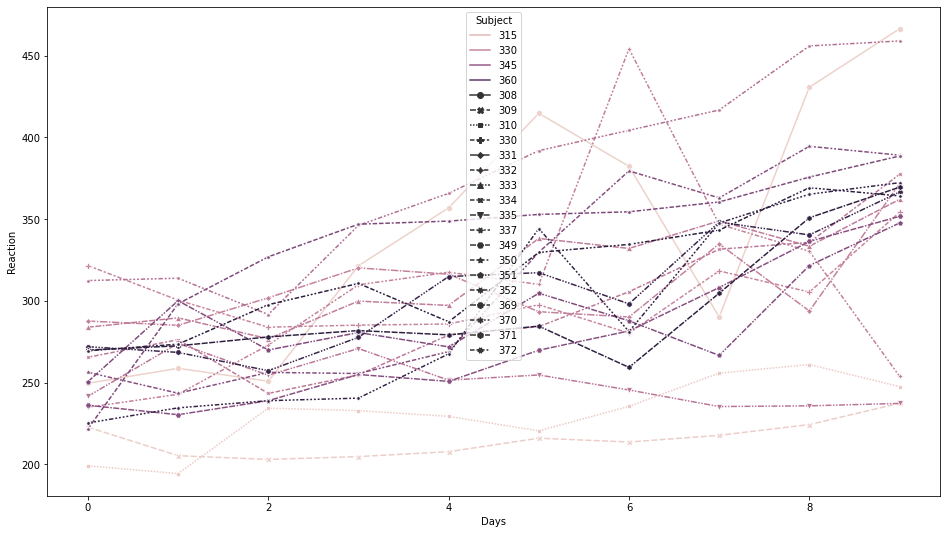

In [129]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Days", y="Reaction", hue = 'Subject', estimator = 'mean', style='Subject', markers=True, data = sort_sleep)
